In [6]:
%load_ext autoreload
%autoreload 2

In [7]:

import config
import gym
from agents.DQN import DQN
from networks.standard_network import standardNN
from networks.basic_network import basicNN
import gym
from typing import Union
import numpy as np
from environments.easy import easy_env
from agents.DQN_RS import DQN_RS
from agents.DQN_TN import DQN_TN
from agents.DDQN import DDQN
from collections import Counter

In [8]:
bj_config = config.config['BLACKJACK']
max_games = 20000
bj_config["hyperparameters"]["max_games"] = max_games
bj_config["hyperparameters"]["lr"] = 1e-3
bj_config["hyperparameters"]["alpha"] = 0.9
bj_config["hyperparameters"]["mini_batch_size"] = 8
bj_config["hyperparameters"]["buffer_size"] = 64
bj_config["hyperparameters"]["min_epsilon"] = 0.25
bj_config["hyperparameters"]["games_to_decay_epsilon_for"] = max_games * 3 // 4

In [9]:
agent = DDQN(bj_config)
verbose = True
agent.play_games(verbose=verbose)
agent.evaluation_mode = True
agent.play_games(5000, verbose=verbose)
agent.evaluation_mode = False

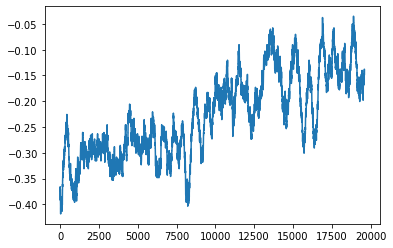

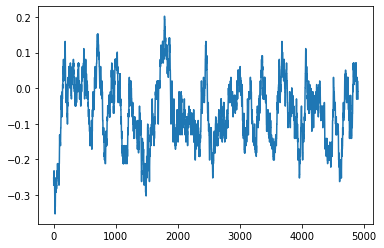

Action counts {0: 4672, 1: 2190}
Mean reward -0.06841368273654731


In [ ]:
agent = DQN_TN(bj_config)
verbose = True
agent.play_games(verbose=verbose)
agent.evaluation_mode = True
agent.play_games(5000, verbose=verbose)
agent.evaluation_mode = False

In [ ]:
agent = DQN(bj_config)
verbose = True
agent.play_games(verbose=verbose)
agent.evaluation_mode = True
agent.play_games(5000, verbose=verbose)
agent.evaluation_mode = False

In [ ]:
agent = DQN_RS(bj_config)
verbose = True
agent.play_games(verbose=verbose)
agent.evaluation_mode = True
agent.play_games(5000, verbose=verbose)
agent.evaluation_mode = False